#Data Loading/Reading

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("dataset_31_credit-g.csv")

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [ ]:
df.nunique()

checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64

In [ ]:
#creating a copy of dataframe
df1=df.copy()
df2=df.copy()

In [ ]:
#renaming the class label as 'df.class' is not usable
df=df.rename(columns={"class": "class_label"})
df

#Distribution of class w.r.t 'personal_status' and 'age'

distribution of personal_status based on class label

In [ ]:
pd.crosstab(df["personal_status"],df.class_label)

class_label,bad,good
personal_status,,
'female div/dep/mar',109,201
'male div/sep',20,30
'male mar/wid',25,67
'male single',146,402


distribution of age based on class label

In [ ]:
#categorizing age column
interval = (18, 25, 33, 55, 100)

cats = ['18-25', '25-33', '33-55', '55<']
df["Age_cat"] = pd.cut(df.age, interval, labels=cats)

In [ ]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class_label,Age_cat
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good,55<
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad,18-25
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good,33-55
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good,33-55
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad,33-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good,25-33
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good,33-55
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good,33-55
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad,18-25


In [ ]:
pd.crosstab(df["Age_cat"],df.class_label)

class_label,bad,good
Age_cat,,
18-25,80,110
25-33,101,225
33-55,100,313
55<,19,52


#Study biasness based on age or personal_status group

Plotting  age and personal_status groups based on class label

Text(0, 0.5, 'age')

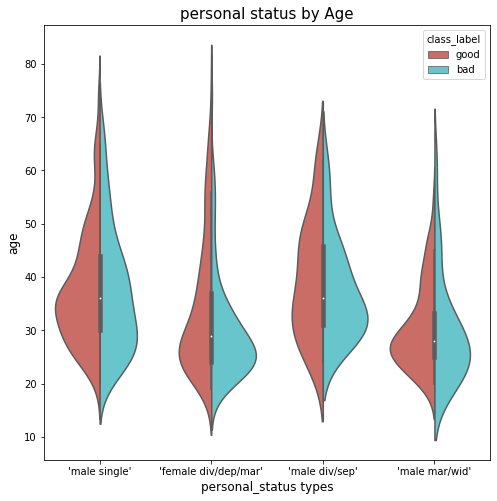

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(8,8))
g1 = sns.violinplot(x="personal_status", y="age", data=df, palette="hls", 
               hue = "class_label", ax=None,split=True)
g1.set_title("personal status by Age", fontsize=15)
g1.set_xlabel("personal_status types", fontsize=12)
g1.set_ylabel("age", fontsize=12)